# Data Science for Supply Chain Forecasting by Nicolas Vandeput (2nd ed.)
### Supplement by Edward Kennedy, July 2022


## Chapter 3
Define a simple smoothing functon that returns a dataframe displaying demand, forecast, and error. Demand is a user furnished input (Python list of observed demands) labeled d, forecast is the mean of the demand from the last n=3 time increments, and error is the actual demand minus the forecast. The simple exponential smoothing forecast will be calculated this dataframe.

Input parameters are the aforementioned d, the number of periods that need to be forecast into the future (extra_periods = 1), and the smoothing parameter alpha (alpha = 0.4). Note we have given extra_periods and alpha default values of 1 and 0.4, respectively.

In [1]:
import pandas as pd
import numpy as np

In [2]:
def simple_exp_smooth(d, extra_periods = 1, alpha = 0.4):
    
    # Historical period length
    cols = len(d)
    
    # Append np.nan into demand array to cover future periods
    d = np.append(d,[np.nan]*extra_periods)
    
    # Define the forecast array.
    f = np.full(cols+extra_periods, np.nan)
    
    # Initiation of first forecast
    f[1] = d[0]
    
    # Create all of the t+1 forecasts until the end of the historical period
    for t in range(2,cols+1):
        f[t]= alpha * d[t-1] + (1 - alpha)*f[t-1]
    
    # Forecast for all extra periods (present forecast = previous forecast)
    for t in range(cols + 1, cols + extra_periods):
        f[t] = f[t-1]
    
    
    # Return a Dataframe with the demand, forecast, and error
    df = pd.DataFrame.from_dict({'Demand': d, 'Forecast':f, 'Error': d-f})
    print(df)
    
    return df

Define the sequence of demands that will be utilized for the forecast. Write them as a Python list.  The same list as used in the book is provided below.

In [3]:
d = [28, 19, 17, 13, 19, 16, 19, 18, 13, 16, 16, 11, 18, 15, 13, 15, 13, 11, 13, 10, 12]

Call the simple exponential smoothing function using four extra time increments and the default alpha.

In [4]:
df = simple_exp_smooth(d, extra_periods= 4)

    Demand   Forecast     Error
0     28.0        NaN       NaN
1     19.0  28.000000 -9.000000
2     17.0  24.400000 -7.400000
3     13.0  21.440000 -8.440000
4     19.0  18.064000  0.936000
5     16.0  18.438400 -2.438400
6     19.0  17.463040  1.536960
7     18.0  18.077824 -0.077824
8     13.0  18.046694 -5.046694
9     16.0  16.028017 -0.028017
10    16.0  16.016810 -0.016810
11    11.0  16.010086 -5.010086
12    18.0  14.006052  3.993948
13    15.0  15.603631 -0.603631
14    13.0  15.362179 -2.362179
15    15.0  14.417307  0.582693
16    13.0  14.650384 -1.650384
17    11.0  13.990231 -2.990231
18    13.0  12.794138  0.205862
19    10.0  12.876483 -2.876483
20    12.0  11.725890  0.274110
21     NaN  11.835534       NaN
22     NaN  11.835534       NaN
23     NaN  11.835534       NaN
24     NaN  11.835534       NaN


### Plot the simple exponential smoothing forecast. 

<AxesSubplot:title={'center':'Simple Smoothing'}>

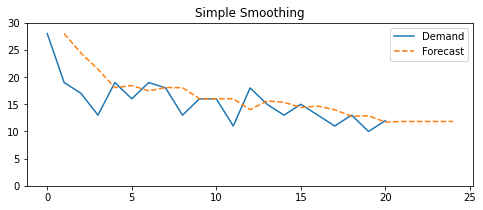

In [5]:
df[['Demand', 'Forecast']].plot(style=['-', '--'], title = 'Simple Smoothing', ylim = (0, 30), figsize=(8,3))

### Calculate KPIs

Calculate the KPIs using the code written in Chapter 2.

In [6]:
def kpi(df):
    dem_ave = df.loc[df['Error'].notnull(), 'Demand'].mean()
    bias_abs = df['Error'].mean()
    bias_rel = bias_abs/dem_ave
    print('Absolute Bias: {:0.2f}'.format(bias_abs))
    print('Relative Bias: {:0.2%}'.format(bias_rel))
    
    MAPE = (df['Error'].abs()/df['Demand']).mean()
    print('MAPE: {:0.2%}'.format(MAPE))
    
    MAE_abs = df['Error'].abs().mean()
    MAE_rel = MAE_abs/dem_ave
    print('MAE Absolute: {:.2f}'.format(MAE_abs))
    print('MAE Relative: {:.2%}'.format(MAE_rel))
    
    RMSE_abs = np.sqrt((df['Error']**2).mean())
    RMSE_rel = RMSE_abs/dem_ave
    print('RMSE Absolute: {:.2f}'.format(RMSE_abs))
    print('RMSE Relative: {:.2%}'.format(RMSE_rel))
    

In [7]:
kpi(df)

Absolute Bias: -2.02
Relative Bias: -13.61%
MAPE: 19.50%
MAE Absolute: 2.77
MAE Relative: 18.68%
RMSE Absolute: 3.93
RMSE Relative: 26.47%


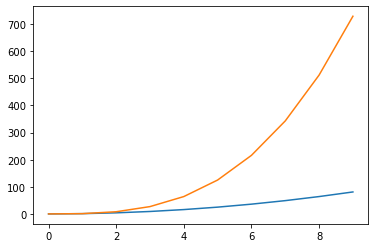

In [8]:
# So the basic idea below is to call ax.plot() for all datasets you need to plot into the same plot.

import matplotlib.pyplot as plt

xvals = [i for i in range(0, 10)]
yvals1 = [i**2 for i in range(0, 10)]
yvals2 = [i**3 for i in range(0, 10)]

f, ax = plt.subplots(1)
ax.plot(xvals, yvals1)
ax.plot(xvals, yvals2)

In [9]:
def moving_average_mod(d, extra_periods = 1, n = 3):
    
    # Historical period length
    cols = len(d)
    
    # Append np.nan into demand array to cover future periods
    d = np.append(d,[np.nan]*extra_periods)
    
    # Define the forecast array.
    f = np.full(cols+extra_periods, np.nan)
    
    for t in range(n,cols):
        f[t]=np.mean(d[t-n:t])
    
    # Forecast for all extra periods
    f[t+1:] = np.mean(d[t-n+1: t+1])
    
    # Return a Dataframe with the demand, forecast, and error
    df = pd.DataFrame.from_dict({'Demand': d, 'Forecast_Moving_Avg':f, 'Error': d-f})
    print(df)
    
    return df

In [10]:
def simple_exp_smooth_mod(d, extra_periods = 1, alpha = 0.4):
    
    # Historical period length
    cols = len(d)
    
    # Append np.nan into demand array to cover future periods
    d = np.append(d,[np.nan]*extra_periods)
    
    # Define the forecast array.
    f = np.full(cols+extra_periods, np.nan)
    
    # Initiation of first forecast
    f[1] = d[0]
    
    # Create all of the t+1 forecasts until the end of the historical period
    for t in range(2,cols+1):
        f[t]= alpha * d[t-1] + (1 - alpha)*f[t-1]
    
    # Forecast for all extra periods (present forecast = previous forecast)
    for t in range(cols + 1, cols + extra_periods):
        f[t] = f[t-1]
    
    
    # Return a Dataframe with the demand, forecast, and error
    df = pd.DataFrame.from_dict({'Demand': d, 'Forecast_Exp_Smooth':f, 'Error': d-f})
    print(df)
    
    return df

In [12]:
df1 = simple_exp_smooth_mod(d, extra_periods= 4)

    Demand  Forecast_Exp_Smooth     Error
0     28.0                  NaN       NaN
1     19.0            28.000000 -9.000000
2     17.0            24.400000 -7.400000
3     13.0            21.440000 -8.440000
4     19.0            18.064000  0.936000
5     16.0            18.438400 -2.438400
6     19.0            17.463040  1.536960
7     18.0            18.077824 -0.077824
8     13.0            18.046694 -5.046694
9     16.0            16.028017 -0.028017
10    16.0            16.016810 -0.016810
11    11.0            16.010086 -5.010086
12    18.0            14.006052  3.993948
13    15.0            15.603631 -0.603631
14    13.0            15.362179 -2.362179
15    15.0            14.417307  0.582693
16    13.0            14.650384 -1.650384
17    11.0            13.990231 -2.990231
18    13.0            12.794138  0.205862
19    10.0            12.876483 -2.876483
20    12.0            11.725890  0.274110
21     NaN            11.835534       NaN
22     NaN            11.835534   

In [13]:
df2 = moving_average_mod(d, extra_periods = 4, n = 3)

    Demand  Forecast_Moving_Avg     Error
0     28.0                  NaN       NaN
1     19.0                  NaN       NaN
2     17.0                  NaN       NaN
3     13.0            21.333333 -8.333333
4     19.0            16.333333  2.666667
5     16.0            16.333333 -0.333333
6     19.0            16.000000  3.000000
7     18.0            18.000000  0.000000
8     13.0            17.666667 -4.666667
9     16.0            16.666667 -0.666667
10    16.0            15.666667  0.333333
11    11.0            15.000000 -4.000000
12    18.0            14.333333  3.666667
13    15.0            15.000000  0.000000
14    13.0            14.666667 -1.666667
15    15.0            15.333333 -0.333333
16    13.0            14.333333 -1.333333
17    11.0            13.666667 -2.666667
18    13.0            13.000000  0.000000
19    10.0            12.333333 -2.333333
20    12.0            11.333333  0.666667
21     NaN            11.666667       NaN
22     NaN            11.666667   

In [52]:
df2['xvals'] = np.arange(0, 25)

In [53]:
df2

,Demand,Forecast_Moving_Avg,Error,xvals
0,28.0,NaN,NaN,0
1,19.0,NaN,NaN,1
2,17.0,NaN,NaN,2
3,13.0,21.333333,-8.333333,3
4,19.0,16.333333,2.666667,4
5,16.0,16.333333,-0.333333,5
6,19.0,16.000000,3.000000,6
7,18.0,18.000000,0.000000,7
8,13.0,17.666667,-4.666667,8
9,16.0,16.666667,-0.666667,9


In [61]:
# xvals = [i for i in range(0, 25)]
# xvals = pd.Series([np.arange(0, 25)])
# xvals = pd.DataFrame([np.arange(0, 25)])

xvals = [df2['xvals']]
yvals1 = [df1['Forecast_Exp_Smooth']]
yvals2 = [df2['Forecast_Moving_Avg']]


[0      0
 1      1
 2      2
 3      3
 4      4
 5      5
 6      6
 7      7
 8      8
 9      9
 10    10
 11    11
 12    12
 13    13
 14    14
 15    15
 16    16
 17    17
 18    18
 19    19
 20    20
 21    21
 22    22
 23    23
 24    24
 Name: xvals, dtype: int32]

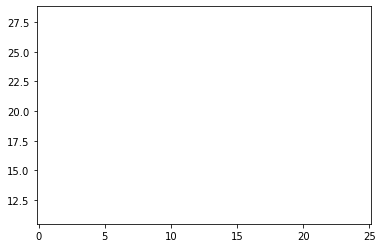

In [60]:
f, ax = plt.subplots(1)
ax.plot(xvals, yvals1)
ax.plot(xvals, yvals2)

In [62]:
df2.plot(x="xvals", y=["Forecast_Moving_Avg)"], kind="line", figsize=(10, 10))

KeyError: "None of [Index(['Forecast_Moving_Avg)'], dtype='object')] are in the [columns]"